In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from keras import regularizers
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Using TensorFlow backend.


In [3]:
df1 = pd.read_csv("../data/imputed/imputed_all.csv")
print(df1.shape)
reasonField = pd.read_csv("../data/imputed/imputed_reason.csv")
df1["REASON"] = reasonField["REASON"]
df2 = pd.read_csv("../data/imputed/imputation_dev.csv")

train_set = df1.to_numpy()
dev_set = df2.to_numpy()


(499992, 246)


In [4]:
print(df1.shape)
print(df2.shape)

(499992, 247)
(50000, 247)


In [5]:

dataFields = {}
for x in range(len(df1.columns)):
	dataFields.update({df1.columns[x]: x})
print(dataFields)
indx = dataFields["REASON"]
y_train = train_set[:,246]
print(y_train[0:100])
y_dev = dev_set[:,[indx]]
# Set to binary classification problem
y_train = np.select([(y_train == 1)], [1] , default = 0)
y_dev = np.select([(y_dev == 1)], [1] , default = 0)

featureWeights = pd.read_csv("../data/rankedFeatures.csv")
fields = list(featureWeights["field"])
desiredChars = [fields[x] for x in range(75)]
print(desiredChars)
indxsToDelete = []
for key, value in dataFields.items():
    if key not in desiredChars:
        indxsToDelete.append(value)
# Delete the reason field for now

X_train = np.delete(train_set, indxsToDelete, 1)
X_dev = np.delete(dev_set, indxsToDelete, 1)

print(X_train.shape)
print(X_dev.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_train[0:200])

{'priminc_wages': 0, 'priminc_public': 1, 'priminc_retirement': 2, 'priminc_other': 3, 'priminc_none': 4, 'priminc_unknown': 5, 'age_approx': 6, 'educ_approx': 7, 'daywait_approx': 8, 'firstuse1_approx': 9, 'firstuse2_approx': 10, 'freq_atnd_self_help_approx': 11, 'gender_male': 12, 'gender_female': 13, 'gender_unknown': 14, 'race_alaska': 15, 'race_native': 16, 'race_asian': 17, 'race_black': 18, 'race_white': 19, 'race_single': 20, 'race_multiple': 21, 'race_unknown': 22, 'ethnic_puerto': 23, 'ethnic_mexican': 24, 'ethnic_cuban': 25, 'ethnic_none': 26, 'ethnic_latino': 27, 'ethnic_unknown': 28, 'marstat_single': 29, 'marstat_married': 30, 'marstat_separated': 31, 'marstat_divorced': 32, 'marstat_unknown': 33, 'employ_full': 34, 'employ_part': 35, 'employ_nlf': 36, 'employ_unemployed': 37, 'employ_unknown': 38, 'pregnant': 39, 'preg_unknown': 40, 'veteran': 41, 'vet_unknown': 42, 'livarag_homeless': 43, 'livarag_dependent': 44, 'livarag_independent': 45, 'livarag_unknown': 46, 'stfips

In [8]:
def create_baseline():
    model = Sequential()
    model.add(Dense(len(desiredChars), input_dim=len(desiredChars), activation = 'relu', kernel_regularizer='l2'))
    model.add(Dense(200, activation = 'relu', kernel_regularizer=regularizers.l2(1e-5)))
    model.add(Dense(200, activation = 'relu', kernel_regularizer=regularizers.l2(1e-5)))
    model.add(Dense(200, activation = 'relu', kernel_regularizer=regularizers.l2(1e-5)))
    model.add(Dense(200, activation = 'relu', kernel_regularizer=regularizers.l2(1e-5)))
    model.add(Dense(200, activation = 'relu', kernel_regularizer=regularizers.l2(1e-5)))
    model.add(Dense(200, activation = 'relu', kernel_regularizer=regularizers.l2(1e-5)))
    model.add(Dense(200, activation = 'relu', kernel_regularizer=regularizers.l2(1e-5)))
    model.add(Dense(200, activation = 'relu', kernel_regularizer=regularizers.l2(1e-5)))
    model.add(Dense(len(desiredChars), activation = 'relu', activity_regularizer=regularizers.l2(1e-5)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    return model

baseline_model = create_baseline()
history = baseline_model.fit(X_train, y_train, validation_data=(X_dev, y_dev), batch_size=256, epochs=100, verbose=1)
_, train_acc = baseline_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = baseline_model.evaluate(X_dev, y_dev, verbose=0)


Train on 499992 samples, validate on 50000 samples
Epoch 1/100
499992/499992 [==============================] - 20s 39us/step - loss: 0.6297 - accuracy: 0.6814 - val_loss: 0.6690 - val_accuracy: 0.6441
Epoch 2/100
499992/499992 [==============================] - 21s 41us/step - loss: 0.5866 - accuracy: 0.6876 - val_loss: 0.8080 - val_accuracy: 0.6051
Epoch 3/100
499992/499992 [==============================] - 21s 42us/step - loss: 0.5825 - accuracy: 0.6894 - val_loss: 0.9335 - val_accuracy: 0.6093
Epoch 4/100
499992/499992 [==============================] - 21s 42us/step - loss: 0.5800 - accuracy: 0.6907 - val_loss: 1.0283 - val_accuracy: 0.6097
Epoch 5/100
499992/499992 [==============================] - 21s 42us/step - loss: 0.5788 - accuracy: 0.6917 - val_loss: 1.1831 - val_accuracy: 0.6059
Epoch 6/100
499992/499992 [==============================] - 21s 41us/step - loss: 0.5771 - accuracy: 0.6943 - val_loss: 1.8759 - val_accuracy: 0.6105
Epoch 7/100
499992/499992 [================

499992/499992 [==============================] - 25s 50us/step - loss: 0.5703 - accuracy: 0.7009 - val_loss: 2.2283 - val_accuracy: 0.6142
Epoch 55/100
499992/499992 [==============================] - 27s 55us/step - loss: 0.5701 - accuracy: 0.7013 - val_loss: 2.0255 - val_accuracy: 0.6071
Epoch 56/100
499992/499992 [==============================] - 29s 57us/step - loss: 0.5705 - accuracy: 0.7011 - val_loss: 2.1362 - val_accuracy: 0.6152
Epoch 57/100
499992/499992 [==============================] - 27s 54us/step - loss: 0.5704 - accuracy: 0.7009 - val_loss: 2.2924 - val_accuracy: 0.6087
Epoch 58/100
499992/499992 [==============================] - 26s 52us/step - loss: 0.5702 - accuracy: 0.7015 - val_loss: 2.1079 - val_accuracy: 0.6059
Epoch 59/100
499992/499992 [==============================] - 27s 54us/step - loss: 0.5704 - accuracy: 0.7011 - val_loss: 1.9601 - val_accuracy: 0.6134
Epoch 60/100
499992/499992 [==============================] - 28s 55us/step - loss: 0.5701 - accuracy

In plotting


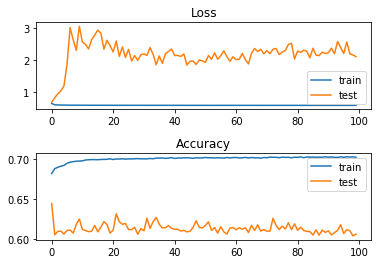

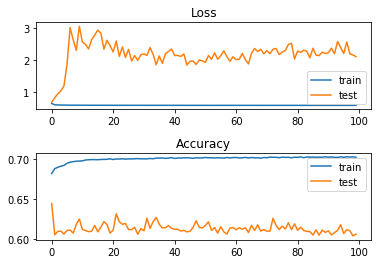

In [9]:
# plot loss during training
print("In plotting")
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.subplots_adjust(hspace=0.5)
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.subplots_adjust(hspace=0.5)
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [10]:
# Setting up our Metrics Functions.  The key idea is we use our fitted baseline_predictor to make predictions.
# We use Keras's inbuilt predict functions() to first make predictions 
yhat_probs = baseline_model.predict(X_dev, verbose=0)
yhat_classes = baseline_model.predict_classes(X_dev, verbose=0)
# The above returns a 2D array, one row for each example in test dataset, and one column for prediction
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
print(np.sum(yhat_classes))

accuracy = accuracy_score(y_dev, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_dev, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_dev, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_dev, yhat_classes)
print('F1 score: %f' % f1)


yhat_classes = baseline_model.predict_classes(X_train, verbose=0)
# The above returns a 2D array, one row for each example in test dataset, and one column for prediction
# yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
print(np.sum(yhat_classes))

accuracy = accuracy_score(y_train, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, yhat_classes)
print('F1 score: %f' % f1)


4239
Accuracy: 0.605840
Precision: 0.476999
Recall: 0.103623
F1 score: 0.170259
185312
Accuracy: 0.700871
Precision: 0.708632
Recall: 0.578784
F1 score: 0.637160


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.561


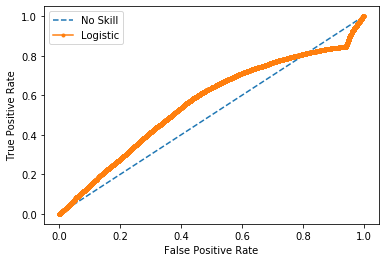

In [11]:
## Final metric is an ROC measure/curve...
ns_probs = [0 for _ in range(len(y_dev))]
deepNN_probs = yhat_probs
ns_auc = roc_auc_score(y_dev, ns_probs)
deepNN_auc = roc_auc_score(y_dev, deepNN_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (deepNN_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_dev, ns_probs)
deepNN_fpr, deepNN_tpr, _ = roc_curve(y_dev, deepNN_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(deepNN_fpr, deepNN_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()